<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/CNN_Transfer_learning_101_food_class_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset 101_food_classes: working on 10 percent dataset.
---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# getting the data tranfer from :
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip' 

--2022-02-20 12:30:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   114MB/s    in 15s     

2022-02-20 12:30:55 (104 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [3]:
## function importing form lib:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np
import zipfile
import datetime
import pathlib
import os

In [4]:
## unzipping the data:
unzip=zipfile.ZipFile('/content/101_food_classes_10_percent.zip')
unzip.extractall()
unzip.close()


In [5]:
## creating the class names:
dir=pathlib.Path("/content/101_food_classes_10_percent/train")
class_name= np.array(sorted([item.name for item in dir.glob('*')]))
class_name,len(class_name)

(array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
        'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
        'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
        'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
        'cheese_plate', 'cheesecake', 'chicken_curry',
        'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
        'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
        'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
        'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
        'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
        'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
        'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
        'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
        'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
        'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'h

In [ ]:
#walk through the directory:
for dirpath, dirnames, filenames in os.walk('101_food_classes_10_percent'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/prime_rib'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/strawberry_shortcake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/takoyaki'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/paella'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/mussels'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/eggs_benedict'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ravioli'.
There are 0 directories and 75 images in '101_food_c

In [6]:
#setting the train and test directory path:
train_dir='/content/101_food_classes_10_percent/train'
test_dir='/content/101_food_classes_10_percent/test'

In [7]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
 ##Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

In [ ]:
## Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB7(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks=[checkpoint_callback]) # save best model weights to file



Epoch 1/5
237/237 [==============================] - 523s 2s/step - loss: 3.3625 - accuracy: 0.2591 - val_loss: 2.5041 - val_accuracy: 0.4243
Epoch 2/5
237/237 [==============================] - 416s 2s/step - loss: 2.3407 - accuracy: 0.4434 - val_loss: 2.1856 - val_accuracy: 0.4674
Epoch 3/5
237/237 [==============================] - 395s 2s/step - loss: 2.0643 - accuracy: 0.4932 - val_loss: 2.0240 - val_accuracy: 0.4846
Epoch 4/5
237/237 [==============================] - 396s 2s/step - loss: 1.8514 - accuracy: 0.5374 - val_loss: 1.9192 - val_accuracy: 0.5069
Epoch 5/5
237/237 [==============================] - 390s 2s/step - loss: 1.7124 - accuracy: 0.5750 - val_loss: 1.8937 - val_accuracy: 0.5082


In [ ]:
# Evaluate model 
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 634s 802ms/step - loss: 1.7879 - accuracy: 0.5359


[1.7878611087799072, 0.5359207987785339]

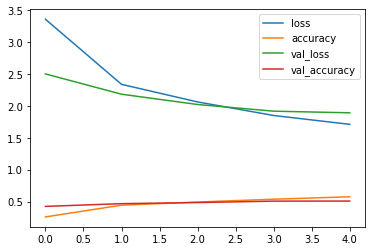

In [ ]:
pd.DataFrame(history_all_classes_10_percent.history).plot()

In [ ]:
## accuracy is worse so we will try again,unfreezing the base model layer (bottom 10)
base_model.trainable= True
for i in base_model.layers[:-7]:
    i.trainable=False

## checking the layers of base model

for layernum,layer_name in enumerate(base_model.layers):
    print(layernum,layer_name.name,layer_name.trainable)

In [ ]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=10,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) # start from previous last epoch

Epoch 5/10
237/237 [==============================] - 383s 2s/step - loss: 1.4470 - accuracy: 0.6215 - val_loss: 1.8402 - val_accuracy: 0.5222
Epoch 6/10
237/237 [==============================] - 344s 1s/step - loss: 1.2956 - accuracy: 0.6548 - val_loss: 1.8215 - val_accuracy: 0.5254
Epoch 7/10
237/237 [==============================] - 346s 1s/step - loss: 1.2137 - accuracy: 0.6791 - val_loss: 1.7987 - val_accuracy: 0.5318
Epoch 8/10
237/237 [==============================] - 333s 1s/step - loss: 1.1225 - accuracy: 0.7007 - val_loss: 1.7855 - val_accuracy: 0.5381
Epoch 9/10
237/237 [==============================] - 330s 1s/step - loss: 1.0483 - accuracy: 0.7151 - val_loss: 1.7487 - val_accuracy: 0.5461
Epoch 10/10
237/237 [==============================] - 328s 1s/step - loss: 0.9858 - accuracy: 0.7353 - val_loss: 1.7196 - val_accuracy: 0.5559


In [ ]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 625s 791ms/step - loss: 1.6783 - accuracy: 0.5688


[1.6782598495483398, 0.5688316822052002]

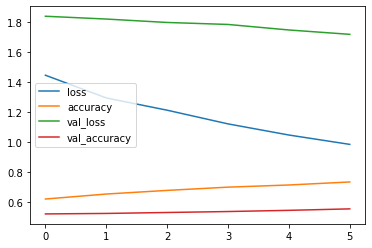

In [ ]:
pd.DataFrame(history_all_classes_10_percent_fine_tune.history).plot()

In [ ]:
model.save('//content/drive/MyDrive/tensorflow_folder/sample_data_modelsave_transfer_learning.h5')

## Evaluating our models predictions
A very simple evaluation is to use Scikit-Learn's accuracy_score() function which compares truth labels to predicted labels and returns an accuracy score.

If we've created our y_labels and pred_classes arrays correctly, this should return the same accuracy value (or at least very close) as the evaluate() method we used earlier.

In [8]:
model=tf.keras.models.load_model('/content/drive/MyDrive/tensorflow_folder/sample_data_modelsave_transfer_learning.h5')

In [52]:
pred_prob=model.predict(test_data)

In [53]:
# Get the class predicitons of each label
pred_classes = pred_prob.argmax(axis=1)
print(f'pred_classes:{pred_classes[:10]}, shape:{pred_prob.shape}')# What's the shape of our predictions?

pred_classes:[85  0  7 38  0  9 22  6  2  0], shape:(25250, 101)


In [11]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)

y_labels[:10]                              # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
# Get accuracy score by comparing predicted classes to ground truth labels

from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.5688316831683168

In [13]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(100, 100), text_size=15, norm=False, savefig=False): 
  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax) ## side color bar shade scale

  # Are there a list of classes?
  #if label are not there  print  integers else print all label cm.shape[0] is 101 tot labels in test dir
  if classes:##default none
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [14]:
# Get the class names
class_names = test_data.class_names
class_names[1]

'baby_back_ribs'

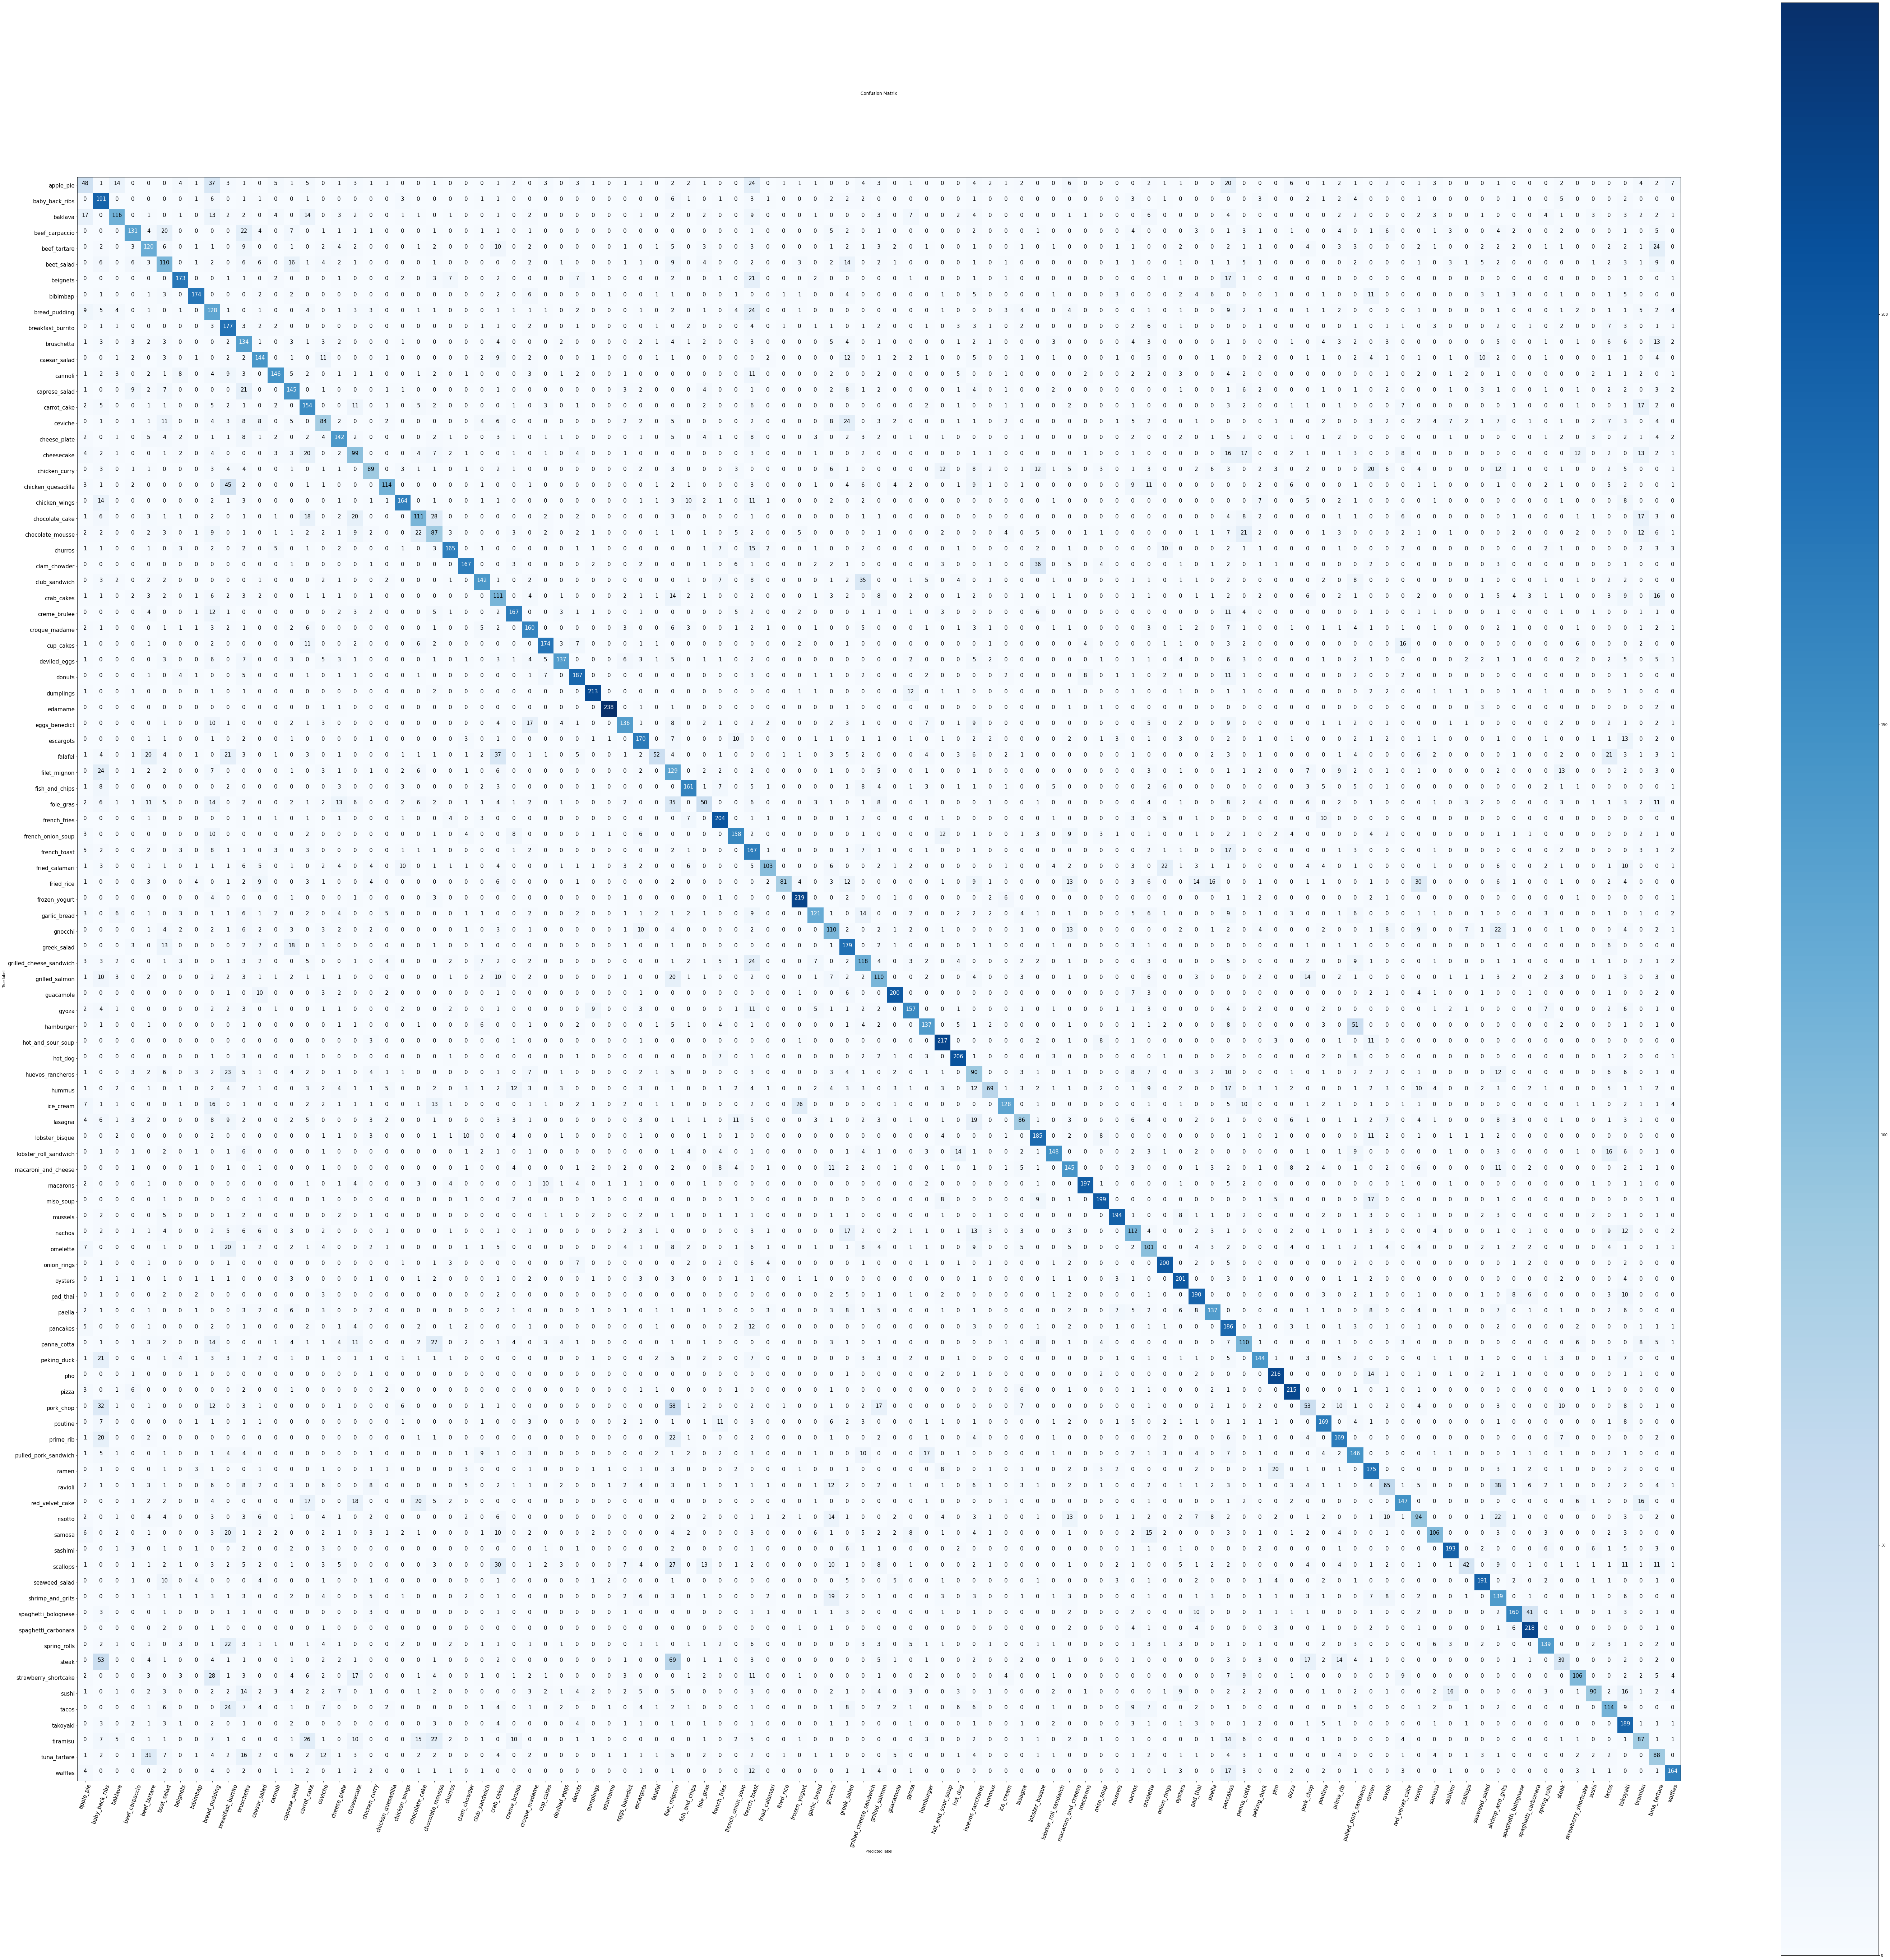

In [15]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      text_size=15,
                      norm=False,
                      savefig=True)

#reminder:

---



**Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).

 **Recall** - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.

**F1 score** **bold text** - Combines precision and recall into one metric. 1 is best, 0 is worst.

In [87]:
## getting the classificatio report: precision,recall,f1-score,support
from sklearn.metrics import classification_report
classification_report_list=classification_report(y_true=y_labels,y_pred=pred_classes)

print(classification_report_list)## gives list format

              precision    recall  f1-score   support

           0       0.27      0.19      0.23       250
           1       0.39      0.76      0.52       250
           2       0.66      0.46      0.54       250
           3       0.67      0.52      0.59       250
           4       0.43      0.48      0.45       250
           5       0.38      0.44      0.41       250
           6       0.77      0.69      0.73       250
           7       0.82      0.70      0.75       250
           8       0.28      0.51      0.36       250
           9       0.40      0.71      0.51       250
          10       0.33      0.54      0.41       250
          11       0.57      0.58      0.57       250
          12       0.77      0.58      0.66       250
          13       0.51      0.58      0.54       250
          14       0.45      0.62      0.52       250
          15       0.38      0.34      0.36       250
          16       0.57      0.57      0.57       250
          17       0.41    

In [94]:
classification_report_dict=classification_report(y_true=y_labels,y_pred=pred_classes,output_dict=True)## give dictionary format

print(classification_report_dict)

{'0': {'precision': 0.2742857142857143, 'recall': 0.192, 'f1-score': 0.22588235294117645, 'support': 250}, '1': {'precision': 0.3890020366598778, 'recall': 0.764, 'f1-score': 0.5155195681511471, 'support': 250}, '2': {'precision': 0.655367231638418, 'recall': 0.464, 'f1-score': 0.5433255269320844, 'support': 250}, '3': {'precision': 0.6683673469387755, 'recall': 0.524, 'f1-score': 0.587443946188341, 'support': 250}, '4': {'precision': 0.43010752688172044, 'recall': 0.48, 'f1-score': 0.45368620037807184, 'support': 250}, '5': {'precision': 0.3819444444444444, 'recall': 0.44, 'f1-score': 0.40892193308550184, 'support': 250}, '6': {'precision': 0.7654867256637168, 'recall': 0.692, 'f1-score': 0.726890756302521, 'support': 250}, '7': {'precision': 0.8207547169811321, 'recall': 0.696, 'f1-score': 0.7532467532467533, 'support': 250}, '8': {'precision': 0.27705627705627706, 'recall': 0.512, 'f1-score': 0.35955056179775285, 'support': 250}, '9': {'precision': 0.39954853273137697, 'recall': 0.7

In [102]:
#creating the empty dictionary
class_f1_scores={}

for key,value in classification_report_dict.items():

    #since we dont neede accuracy macro avg and weighted avg
    if key=='accuracy':
        break
    else:
        class_f1_scores[class_names[int(key)]]=value["f1-score"]

In [103]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
33,edamame,0.955823
32,dumplings,0.852000
63,macarons,0.847312
45,frozen_yogurt,0.835878
75,pho,0.835590
...,...,...
39,foie_gras,0.268097
87,scallops,0.264151
77,pork_chop,0.257282
0,apple_pie,0.225882


## predicting the image:

In [75]:
def load_and_prep_image(filename):
  
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img,channels=3)
  # Resize the image
  img = tf.image.resize(img, [224,224])
  return img

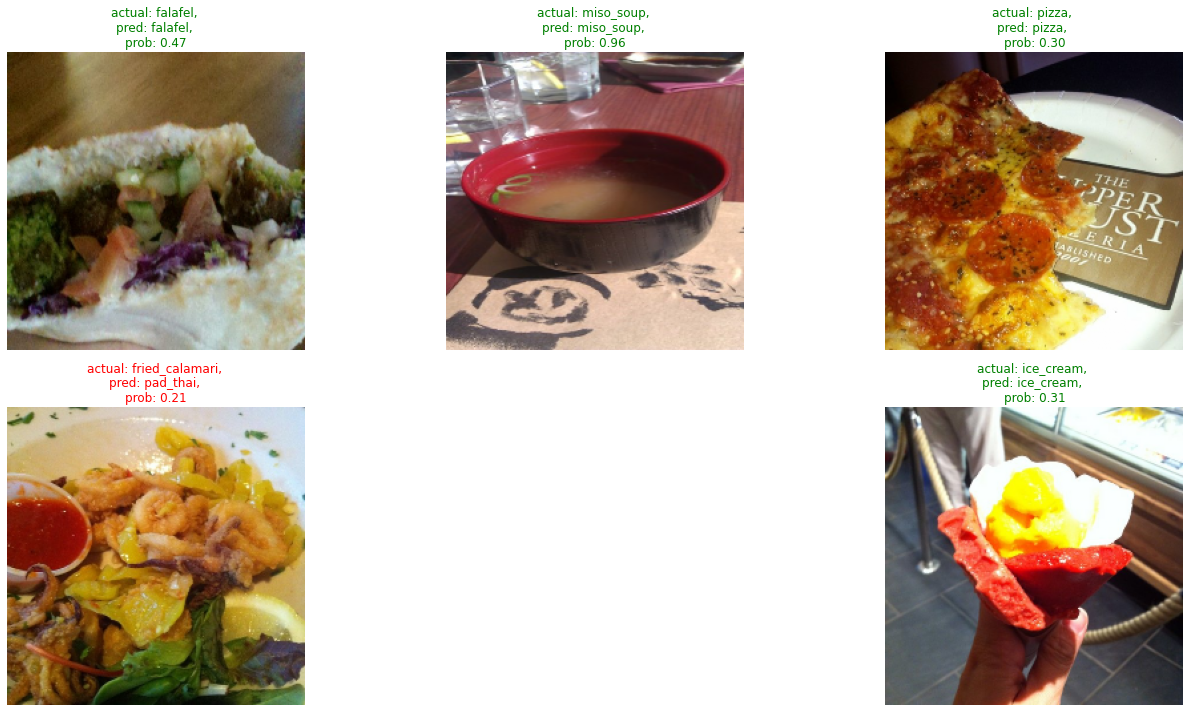

In [17]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(20,10))
for i in range(6):
  # Choose a random image from a random class 
  class_name=random.choice(class_names)
  file_name=random.choice(os.listdir(test_dir+'/'+class_name))
  filepath=test_dir+'/' + class_name +'/' + file_name

  # Load the image and make predictions
  img = load_and_prep_image(filepath) # don't scale images for EfficientNet predictions
  
  image=tf.expand_dims(img,axis=0)
  pred_prob = model.predict(image) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(2, 3, i+1)
  plt.imshow(img/255)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, \npred: {pred_class}, \nprob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);
  plt.tight_layout()

## Finding the Wrong Predictions:

In [32]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg", 
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [56]:
pred_df=pd.DataFrame({
                     'img_path':filepaths,
                      'y_true':y_labels,
                      'y_pred':pred_classes,
                      'pred_conf': pred_prob.max(axis=1),
                      "y_true_classname": [class_names[i] for i in y_labels],
                      "y_pred_classname":[class_names[i] for i in pred_classes]})
pred_df['pred_correct']=pred_df['y_true']==pred_df['y_pred']
pred_df[:10]

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'101_food_classes_10_percent/test/apple_pie/1...,0,85,0.300993,apple_pie,samosa,False
1,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.592148,apple_pie,apple_pie,True
2,b'101_food_classes_10_percent/test/apple_pie/1...,0,7,0.254500,apple_pie,bibimbap,False
3,b'101_food_classes_10_percent/test/apple_pie/1...,0,38,0.324902,apple_pie,fish_and_chips,False
4,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.481085,apple_pie,apple_pie,True
5,b'101_food_classes_10_percent/test/apple_pie/1...,0,9,0.349180,apple_pie,breakfast_burrito,False
6,b'101_food_classes_10_percent/test/apple_pie/1...,0,22,0.428371,apple_pie,chocolate_mousse,False
7,b'101_food_classes_10_percent/test/apple_pie/1...,0,6,0.448890,apple_pie,beignets,False
8,b'101_food_classes_10_percent/test/apple_pie/1...,0,2,0.251602,apple_pie,baklava,False
9,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.418828,apple_pie,apple_pie,True


In [67]:
top_100_wrong_predictions=pred_df[pred_df['pred_correct']==False].sort_values('pred_conf',ascending=False)[:100]
top_100_wrong_predictions

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
21148,b'101_food_classes_10_percent/test/risotto/291...,84,62,0.999432,risotto,macaroni_and_cheese,False
15826,b'101_food_classes_10_percent/test/macarons/19...,63,29,0.999310,macarons,cup_cakes,False
19639,b'101_food_classes_10_percent/test/poutine/309...,78,28,0.998905,poutine,croque_madame,False
10947,b'101_food_classes_10_percent/test/fried_calam...,43,68,0.998768,fried_calamari,onion_rings,False
20547,b'101_food_classes_10_percent/test/ravioli/177...,82,35,0.998382,ravioli,escargots,False
...,...,...,...,...,...,...,...
6088,b'101_food_classes_10_percent/test/clam_chowde...,24,60,0.969863,clam_chowder,lobster_bisque,False
14590,b'101_food_classes_10_percent/test/ice_cream/2...,58,69,0.969164,ice_cream,oysters,False
23282,b'101_food_classes_10_percent/test/steak/14437...,93,37,0.968997,steak,filet_mignon,False
7710,b'101_food_classes_10_percent/test/deviled_egg...,30,72,0.968859,deviled_eggs,pancakes,False


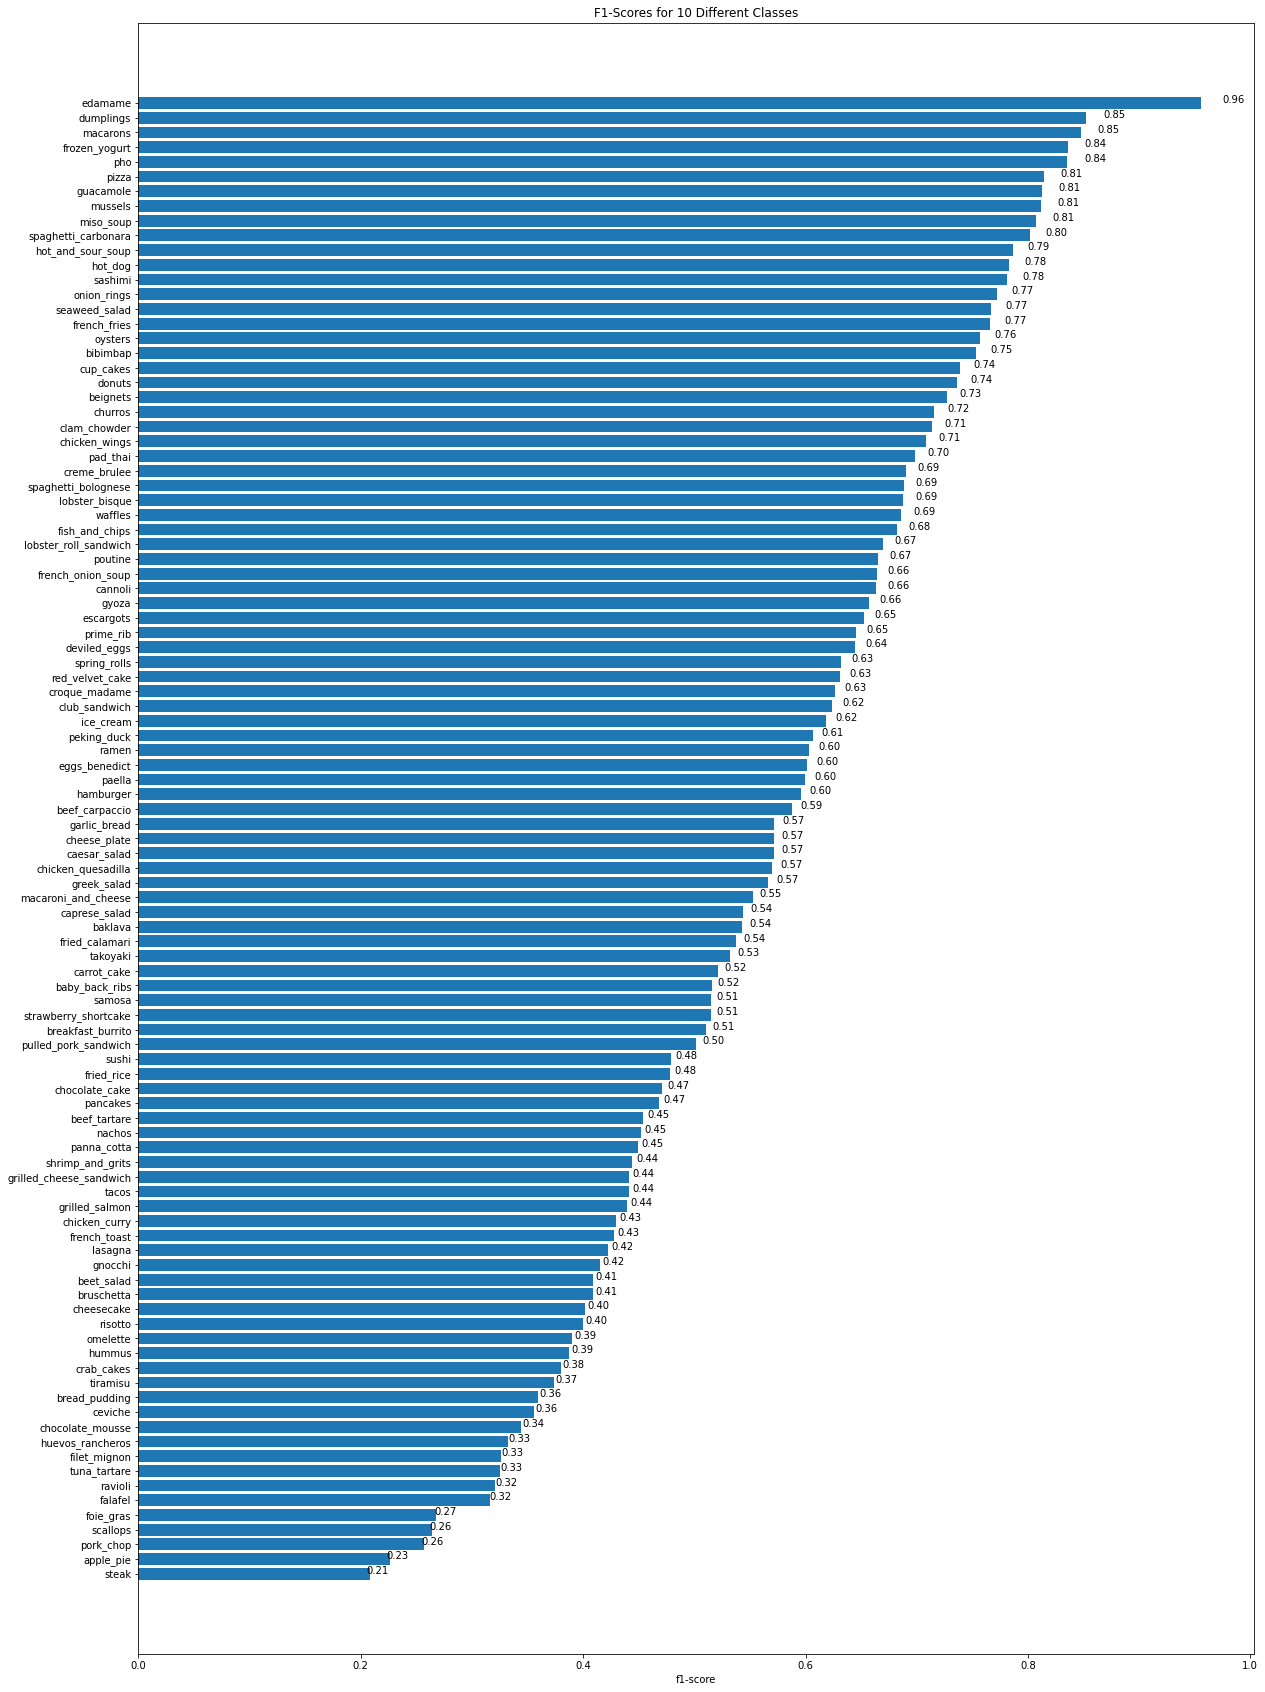

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 30))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)